<a href="https://colab.research.google.com/github/mrzack18/Zaki_Muhamad-2306094-Latihan_Workflow_AI/blob/main/Zaki_Muhamad_2306094_Latihan_Workflow_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

# Buat data penjualan toko
data = {
    "Tanggal": ["2025-02-07", "2025-02-07", "2025-02-08", "2025-02-08", "2025-02-09", "2025-02-09",
                "2025-02-10", "2025-02-10", "2025-02-11", "2025-02-11"],
    "Produk": ["Minyak Goreng", "Beras", "Gula", "Tepung", "Mie Instan", "Susu", "Minyak Ikan",
               "Beras Bulog", "Gula Padi", "Tepung Tapioka"],
    "Jumlah Terjual": [9, 7, 6, 5, 14, 9, 10, 8, 5, 4],
    "Stok": [10, 8, 4, 6, 18, 5, 12, 9, 6, 7],
    "Harga Satuan": [15000, 12000, 13000, 11000, 3000, 18000, 15000, 12000, 13000, 11000]
}

# Simpan dalam DataFrame
df = pd.DataFrame(data)

# Simpan sebagai file CSV
df.to_csv("data_penjualan.csv", index=False)

print("File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan.csv'!")

File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan.csv'!


In [13]:
# Membaca file CSV
df = pd.read_csv("data_penjualan.csv")

# Menampilkan 5 data pertama
print(df.head(10))

      Tanggal          Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-02-07   Minyak Goreng               9    10         15000
1  2025-02-07           Beras               7     8         12000
2  2025-02-08            Gula               6     4         13000
3  2025-02-08          Tepung               5     6         11000
4  2025-02-09      Mie Instan              14    18          3000
5  2025-02-09            Susu               9     5         18000
6  2025-02-10     Minyak Ikan              10    12         15000
7  2025-02-10     Beras Bulog               8     9         12000
8  2025-02-11       Gula Padi               5     6         13000
9  2025-02-11  Tepung Tapioka               4     7         11000


In [14]:
# Cek apakah ada data yang kosong
print(df.isnull().sum())

# Konversi kolom "Tanggal" ke format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

# Tambahkan kolom "Total Penjualan"
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

# Tambahkan kolom "Keuntungan" (asumsi modal 10.000 per produk)
df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] * 10000)

# Menampilkan hasil transformasi
print(df.head(10))


Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     Tanggal          Produk  Jumlah Terjual  Stok  Harga Satuan  \
0 2025-02-07   Minyak Goreng               9    10         15000   
1 2025-02-07           Beras               7     8         12000   
2 2025-02-08            Gula               6     4         13000   
3 2025-02-08          Tepung               5     6         11000   
4 2025-02-09      Mie Instan              14    18          3000   
5 2025-02-09            Susu               9     5         18000   
6 2025-02-10     Minyak Ikan              10    12         15000   
7 2025-02-10     Beras Bulog               8     9         12000   
8 2025-02-11       Gula Padi               5     6         13000   
9 2025-02-11  Tepung Tapioka               4     7         11000   

   Total Penjualan  Keuntungan  
0           135000       45000  
1            84000       14000  
2            78000       18000  
3     

In [15]:
!pip install scikit-learn

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pilih fitur (X) dan target (y)
X = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int)  # 1 jika stok kurang dari 5, 0 jika cukup

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print("Akurasi Model:", accuracy_score(y_test, y_pred))


Akurasi Model: 1.0


In [17]:
# Contoh produk baru (jumlah terjual 8, stok tersisa 3)
produk_baru = [[8, 3]]
prediksi = model.predict(produk_baru)

if prediksi[0] == 1:
    print("Produk perlu di-restock!")
else:
    print("Stok masih cukup.")


Produk perlu di-restock!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


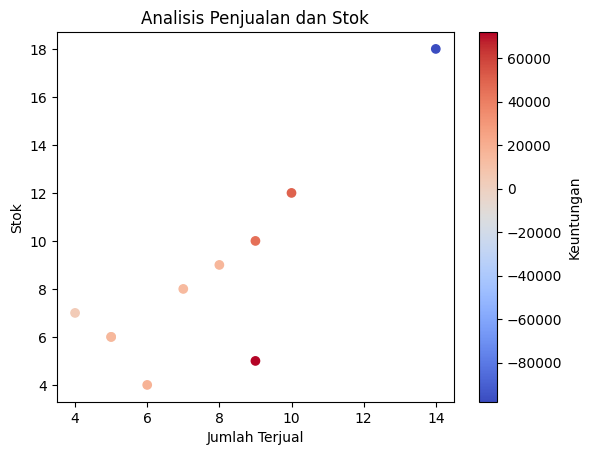

In [18]:
import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar(label="Keuntungan")
plt.show()
